# Time Series Data Analysis and Future Prediction: Part I

In this project I am going to analyze the housing price in Austin, TX area using two different zipcodes: I took the data from Quandl which is 2010-11-30 to 2017-05-31 as per month. The price value is in the order of 10^5.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data import using quandal code and key:


In [5]:
#import quandl
#north_austin = quandl.get('ZILLOW/N11993_ZHVIAH', authtoken="your key here")

Let first read data file using pandas. 

In [6]:
#north_austin.plot()

In [7]:
##Read data for zipcode 78701 and set Date as index
zip_01 = pd.read_csv('ZILLOW-Z78701_ZRIFAH.csv', index_col='Date')
zip_01 = zip_01.sort_index(axis=0, ascending=True)

In [8]:
zip_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2010-11-30 to 2017-05-31
Data columns (total 1 columns):
Value    79 non-null float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [9]:
zip_01.head()

,Value
Date,
2010-11-30,1.786
2010-12-31,1.802
2011-01-31,1.838
2011-02-28,1.886
2011-03-31,1.924


In [10]:
##Read data for zipcode 78717
zip_17 = pd.read_csv('ZILLOW-Z78717_ZRIFAH.csv', index_col='Date')
zip_17 = zip_17.sort_index(axis=0, ascending=True)

In [11]:
zip_17.head()

,Value
Date,
2010-11-30,0.662
2010-12-31,0.668
2011-01-31,0.672
2011-02-28,0.678
2011-03-31,0.678


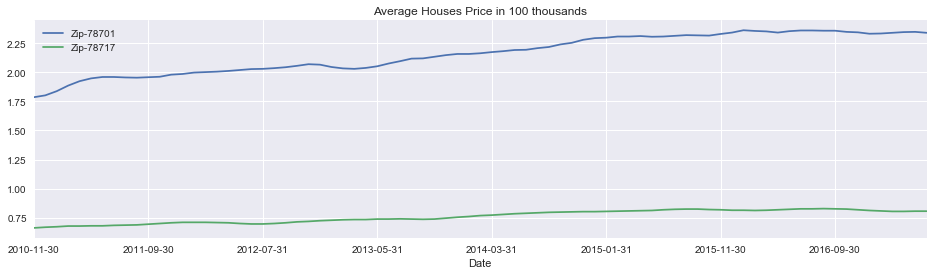

In [31]:
zip_01['Value'].plot(label='Zip-78701',figsize=(16,4), title='Average Houses Price in 100 thousands')
zip_17['Value'].plot(label='Zip-78717')
plt.legend();

## Lets check when is maxmimum value of housing price.

In [13]:
zip_01['Value'].argmax()

'2016-01-31'

In [14]:
zip_17['Value'].argmax()

'2016-08-31'

Our data is already smooth so there is no need of smoothing but still we can do some test.
Lets do moving averages of 2 months and 5 months on zip_01 data.

In [15]:
zip_01['MA2']=zip_01['Value'].rolling(2).mean()
zip_01['MA5']=zip_01['Value'].rolling(5).mean()

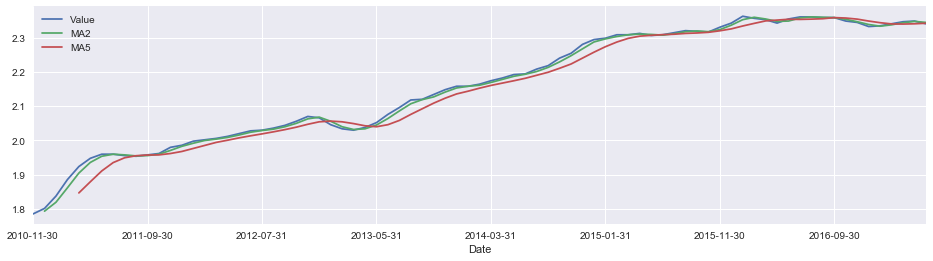

In [16]:
zip_01[['Value', 'MA2', 'MA5']].plot(figsize=(16,4))

Let concanate the zip_01 and zip_17 data in same file.

In [17]:
price = pd.concat([zip_01['Value'], zip_17['Value']], axis=1)

In [18]:
price.columns=['Value zip_01', 'Value zip_17']

In [19]:
price.head()

,Value zip_01,Value zip_17
Date,,
2010-11-30,1.786,0.662
2010-12-31,1.802,0.668
2011-01-31,1.838,0.672
2011-02-28,1.886,0.678
2011-03-31,1.924,0.678


In [20]:
from pandas.plotting import scatter_matrix

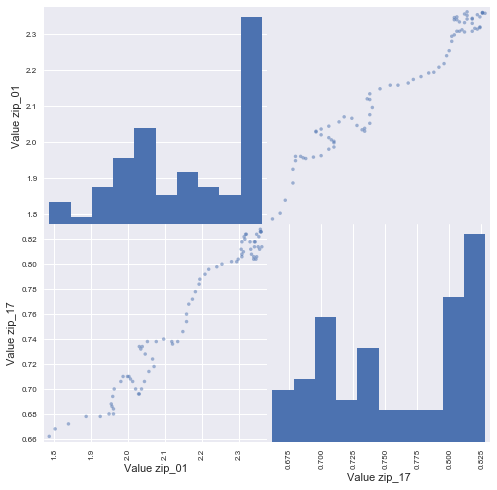

In [21]:
scatter_matrix(price,figsize=(8,8));

Lets calculate the monthly percentage change of housing price using formula.
r_t = (P_t/P_t-1)  -1

In [22]:
zip_01['Monthly_Change'] = (zip_01['Value']/zip_01['Value'].shift(1) - 1)

In [23]:
zip_01['Monthly_Change']

Date
2010-11-30         NaN
2010-12-31    0.008959
2011-01-31    0.019978
2011-02-28    0.026115
2011-03-31    0.020148
2011-04-30    0.012474
2011-05-31    0.006160
2011-06-30    0.000000
2011-07-31   -0.002041
2011-08-31   -0.001022
2011-09-30    0.002047
2011-10-31    0.002043
2011-11-30    0.009174
2011-12-31    0.003030
2012-01-31    0.006042
2012-02-29    0.002002
2012-03-31    0.001998
2012-04-30    0.002991
2012-05-31    0.003976
2012-06-30    0.003960
2012-07-31    0.000986
2012-08-31    0.002956
2012-09-30    0.003929
2012-10-31    0.005871
2012-11-30    0.006809
2012-12-31   -0.001932
2013-01-31   -0.009681
2013-02-28   -0.005865
2013-03-31   -0.001967
2013-04-30    0.003941
                ...   
2014-12-31    0.006140
2015-01-31    0.001744
2015-02-28    0.004352
2015-03-31    0.000000
2015-04-30    0.001733
2015-05-31   -0.002595
2015-06-30    0.000867
2015-07-31    0.002600
2015-08-31    0.002593
2015-09-30   -0.000862
2015-10-31   -0.000863
2015-11-30    0.006045
2015-1

But this can be done by using pandas builtin pct function also.

In [24]:
# 1 in parenthesis is time unit in data frame. If there are daily data then it is daily 
# percentage change. But in this case it is monthly change.
zip_01['Monthly_Change'] = zip_01['Value'].pct_change(1)

In [25]:
zip_01['Monthly_Change']

Date
2010-11-30         NaN
2010-12-31    0.008959
2011-01-31    0.019978
2011-02-28    0.026115
2011-03-31    0.020148
2011-04-30    0.012474
2011-05-31    0.006160
2011-06-30    0.000000
2011-07-31   -0.002041
2011-08-31   -0.001022
2011-09-30    0.002047
2011-10-31    0.002043
2011-11-30    0.009174
2011-12-31    0.003030
2012-01-31    0.006042
2012-02-29    0.002002
2012-03-31    0.001998
2012-04-30    0.002991
2012-05-31    0.003976
2012-06-30    0.003960
2012-07-31    0.000986
2012-08-31    0.002956
2012-09-30    0.003929
2012-10-31    0.005871
2012-11-30    0.006809
2012-12-31   -0.001932
2013-01-31   -0.009681
2013-02-28   -0.005865
2013-03-31   -0.001967
2013-04-30    0.003941
                ...   
2014-12-31    0.006140
2015-01-31    0.001744
2015-02-28    0.004352
2015-03-31    0.000000
2015-04-30    0.001733
2015-05-31   -0.002595
2015-06-30    0.000867
2015-07-31    0.002600
2015-08-31    0.002593
2015-09-30   -0.000862
2015-10-31   -0.000863
2015-11-30    0.006045
2015-1

In [26]:
zip_17['Monthly_Change'] = zip_17['Value'].pct_change(1)

In [27]:
zip_17['Monthly_Change']

Date
2010-11-30         NaN
2010-12-31    0.009063
2011-01-31    0.005988
2011-02-28    0.008929
2011-03-31    0.000000
2011-04-30    0.002950
2011-05-31    0.000000
2011-06-30    0.005882
2011-07-31    0.002924
2011-08-31    0.002915
2011-09-30    0.008721
2011-10-31    0.008646
2011-11-30    0.008571
2011-12-31    0.005666
2012-01-31    0.000000
2012-02-29    0.000000
2012-03-31   -0.002817
2012-04-30   -0.002825
2012-05-31   -0.008499
2012-06-30   -0.005714
2012-07-31    0.000000
2012-08-31    0.005747
2012-09-30    0.008571
2012-10-31    0.011331
2012-11-30    0.005602
2012-12-31    0.008357
2013-01-31    0.005525
2013-02-28    0.005495
2013-03-31    0.002732
2013-04-30    0.000000
                ...   
2014-12-31    0.000000
2015-01-31    0.002494
2015-02-28    0.002488
2015-03-31    0.002481
2015-04-30    0.002475
2015-05-31    0.002469
2015-06-30    0.007389
2015-07-31    0.004890
2015-08-31    0.002433
2015-09-30    0.000000
2015-10-31   -0.004854
2015-11-30   -0.002439
2015-1

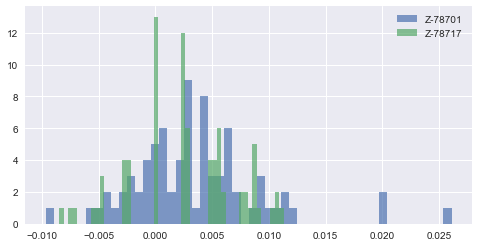

In [28]:
zip_01['Monthly_Change'].hist(bins=50, label = 'Z-78701', figsize=(8,4), alpha=0.7)
zip_17['Monthly_Change'].hist(bins=50, label = 'Z-78717', figsize=(8,4), alpha=0.7)
plt.legend();

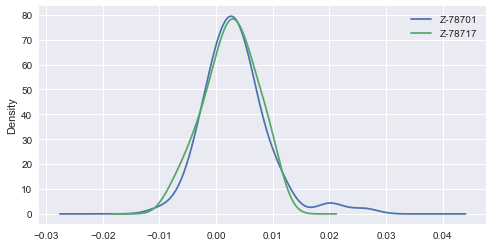

In [29]:
zip_01['Monthly_Change'].plot(kind='kde', label = 'Z-78701', figsize=(8,4))
zip_17['Monthly_Change'].plot(kind='kde', label = 'Z-78717', figsize=(8,4))
plt.legend();

DO FUTURE PREDICTION BY ARIMA MODEL